# Numerical methods

### Estimation of piping failure probability (Bligh's model)

In this example, we will demonstrate the application of the numerical reliability methods (`numerical_integration` and `numerical_bisection`) to estimate the probability of failure of a levee due to piping mechanism. The failure mechanism is characterized here using the simple model of Bligh.

### Define model

First, we import the necessary classes:

In [8]:
from probabilistic_library import ReliabilityProject, DistributionType, ReliabilityMethod

The limit state function according to the piping model of Bligh is defined as follows:

$Z = \frac{m \cdot L}{c_{creep}} -\Delta H$

where: <br>

$\Delta H$ is the difference between the water level on the levee and the water level in the polder (m) <br>
$L$ is the seepage path length (m) <br>
$m$ represents model uncertainty (-) <br>
$c_{creep}$ is the creep factor (-)

The parameter $\Delta H$ represents the imposed load, while $L$ stands for the strength of the levee. The creep factor value for very fine-grained sand is $18$.

In [9]:
from utils.models import bligh

To perform a reliability analysis, we create a reliability project and specify the limit state function (model):

In [10]:
project = ReliabilityProject()
project.model = bligh

project.model.print()

Model bligh:
Input parameters:
  m
  L
  c_creep
  delta_H
Output parameters:
  Z


We assume the following distributions for the parameters $m$, $L$, $c_{creep}$ and $\Delta H$:

In [11]:
project.variables["m"].distribution = DistributionType.log_normal
project.variables["m"].mean = 1.76
project.variables['m'].deviation = 1.69

project.variables["L"].distribution = DistributionType.normal
project.variables["L"].mean = 50
project.variables["L"].deviation = 2.5

project.variables["c_creep"].distribution = DistributionType.deterministic
project.variables["c_creep"].mean = 18

project.variables["delta_H"].distribution = DistributionType.gumbel
project.variables["delta_H"].shift = 0.53
project.variables["delta_H"].scale = 0.406

### Perform reliability calculations with Numerical Integration

We start with the reliability method `numerical_integration`. The reliability analysis is executed using `project.run()`, and the results are accessed from `project.design_point`.

Reliability:
 Reliability index = 1.661
 Probability of failure = 0.0484
 Model runs = 50001
Alpha values:
 m: alpha = 0.8141, x = 0.4257
 L: alpha = 0.04915, x = 49.8
 c_creep: alpha = 0, x = 18
 delta_H: alpha = -0.5787, x = 1.217



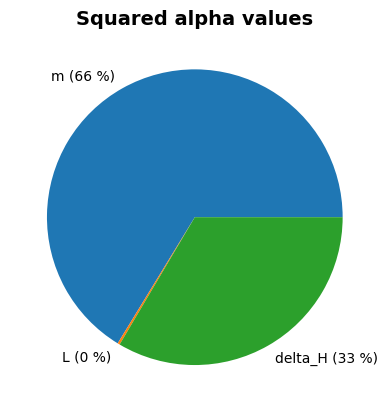

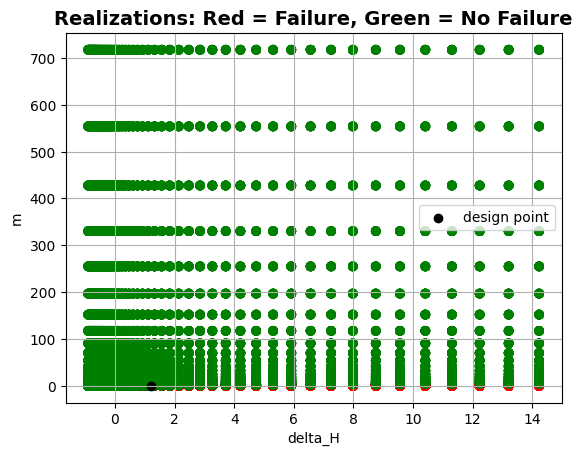

In [12]:
project.settings.reliability_method = ReliabilityMethod.numerical_integration
project.settings.stochast_settings["m"].intervals = 50
project.settings.stochast_settings["L"].intervals = 20
project.settings.stochast_settings["delta_H"].intervals = 50
project.settings.save_realizations = True

project.run()

project.design_point.print()
project.design_point.plot_alphas()
project.design_point.plot_realizations()


### Perform reliability calculations with Numerical bisection

We now conduct the reliability analysis using the `numerical_bisection` method.

Reliability (Numerical Bisection)
 Reliability index = 1.66
 Probability of failure = 0.04851
 Convergence = 0.09003 (not converged)
 Model runs = 10343
Alpha values:
 m: alpha = 0.8233, x = 0.4207
 L: alpha = 0.05128, x = 49.79
 c_creep: alpha = 0, x = 18
 delta_H: alpha = -0.5653, x = 1.202



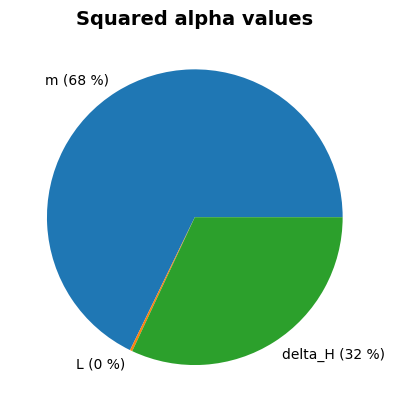

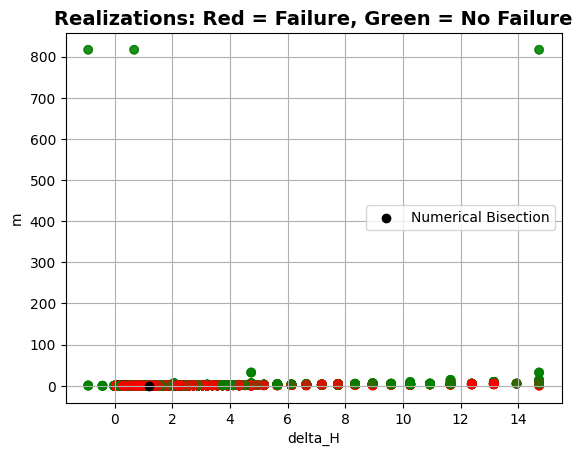

In [13]:
project.settings.reliability_method = ReliabilityMethod.numerical_bisection
project.settings.minimum_iterations = 5
project.settings.maximum_iterations = 10
project.settings.epsilon_beta = 0.1

project.run()

project.design_point.print()
project.design_point.plot_alphas()
project.design_point.plot_realizations()